<a href="https://colab.research.google.com/github/betr0dalf/TIMO/blob/main/TIMO_NovikovDV_prac4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Технологии и инструментарий машинного обучения
# Практическая работа № 4
# Выполнил студент группы ИНБО-05-22
# Новиков Денис Владиславович

## Этап 1. Подготовка данных
1. Найти и загрузить набор данных для задачи классификации.
2. Провести необходимые шаги по предобработке данных:
    *   Проверить на наличие пропущенных значений и обработать их.
    *   Нормализовать или стандартизировать числовые признаки (если это необходимо для алгоритмов).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_recall_curve, roc_auc_score, auc, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('diabetes_dataset.csv')

# Удаление повторяющихся строк
data = data.drop_duplicates()

print(data.head())
print(data.columns)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


## Этап 2. Реализация моделей:
1. Используя функцию `train_test_split`, разделить набор данных на обучающую и тестовую выборки.
2. Реализовать модели:
    *   Логистическая регрессия (`LogisticRegression`).
    *   Метод k-ближайших соседей (`KNeighborsClassifier`).
    *   Метод опорных векторов (SVM) (`SVC`).
3. Настроить гиперпараметры моделей с помощью `GridSearchCV`.

In [ ]:
x = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

In [ ]:
# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Определение параметров для поиска для логистической регрессии
param_grid_log_reg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Создание модели логистической регрессии
log_reg = LogisticRegression()

# Поиск по сетке
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)

# Лучшие параметры и точность
print("Best parameters for Logistic Regression: ", grid_search_log_reg.best_params_)
print("Best accuracy for Logistic Regression: ", grid_search_log_reg.best_score_)

# Обучение модели с лучшими параметрами
best_log_reg = grid_search_log_reg.best_estimator_
best_log_reg.fit(X_train, y_train)

Best parameters for Logistic Regression:  {'C': 1, 'solver': 'liblinear'}
Best accuracy for Logistic Regression:  0.7819833852544132


LogisticRegression(C=1, solver='liblinear')

In [ ]:
# Определение параметров для поиска для KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Создание модели KNN
knn = KNeighborsClassifier()

# Поиск по сетке
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Лучшие параметры и точность
print("Best parameters for KNN: ", grid_search_knn.best_params_)
print("Best accuracy for KNN: ", grid_search_knn.best_score_)

# Обучение модели с лучшими параметрами
best_knn = grid_search_knn.best_estimator_
best_knn.fit(X_train, y_train)

Best parameters for KNN:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best accuracy for KNN:  0.7355486327448943


KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [ ]:
# Определение параметров для поиска для SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Создание модели SVM
svm = SVC(probability=True)

# Поиск по сетке
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Лучшие параметры и точность
print("Best parameters for SVM: ", grid_search_svm.best_params_)
print("Best accuracy for SVM: ", grid_search_svm.best_score_)

# Обучение модели с лучшими параметрами
best_svm = grid_search_svm.best_estimator_
best_svm.fit(X_train, y_train)

Best parameters for SVM:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best accuracy for SVM:  0.7726548978885427


SVC(C=1, kernel='linear', probability=True)

## Этап 3. Оценка качества моделей:
1. Оценить модели на основе метрик accuracy, F1, confusion matrix.
2. Построить PR и ROC кривые для каждой модели.
3. Рассчитать PR-AUC и ROC-AUC для каждой модели.
4. Сравнить результаты моделей по всем метрикам.

In [ ]:
# Функция для оценки модели
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print(f"PR-AUC: {pr_auc:.2f}")
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix")
    print(pd.DataFrame(cm, columns=[f'Predicted {i}' for i in np.unique(y_test)], index=[f'Actual {i}' for i in np.unique(y_test)]))


    return accuracy, f1, cm, roc_auc, pr_auc

# Оценка моделей
print("Logistic Regression with best parameters:")
evaluate_model(best_log_reg, X_test, y_test)

print("\nK-Nearest Neighbors with best parameters:")
evaluate_model(best_knn, X_test, y_test)

print("\nSupport Vector Machine with best parameters:")
evaluate_model(best_svm, X_test, y_test)

Logistic Regression with best parameters:
Accuracy: 0.76
F1-Score: 0.60
ROC-AUC: 0.80
PR-AUC: 0.64
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          134           19
Actual 1           36           42

K-Nearest Neighbors with best parameters:
Accuracy: 0.74
F1-Score: 0.59
ROC-AUC: 0.77
PR-AUC: 0.59
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          130           23
Actual 1           36           42

Support Vector Machine with best parameters:
Accuracy: 0.76
F1-Score: 0.59
ROC-AUC: 0.79
PR-AUC: 0.65
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          135           18
Actual 1           38           40


(0.7575757575757576,
 0.5882352941176471,
 array([[135,  18],
        [ 38,  40]]),
 0.7938662644544997,
 0.6501064814598938)

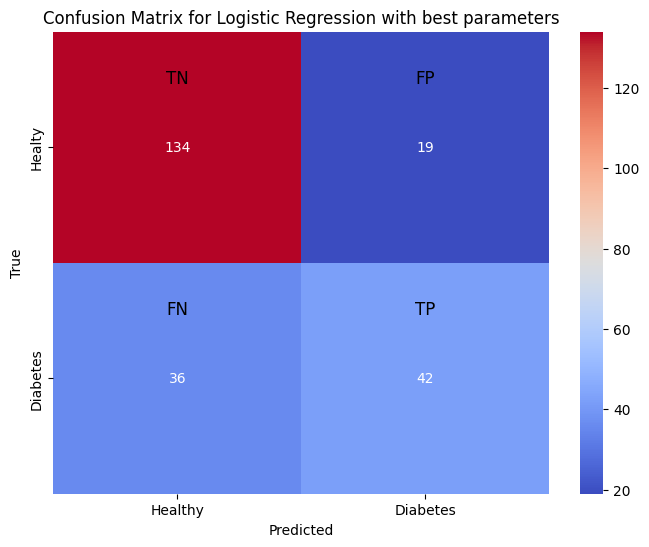

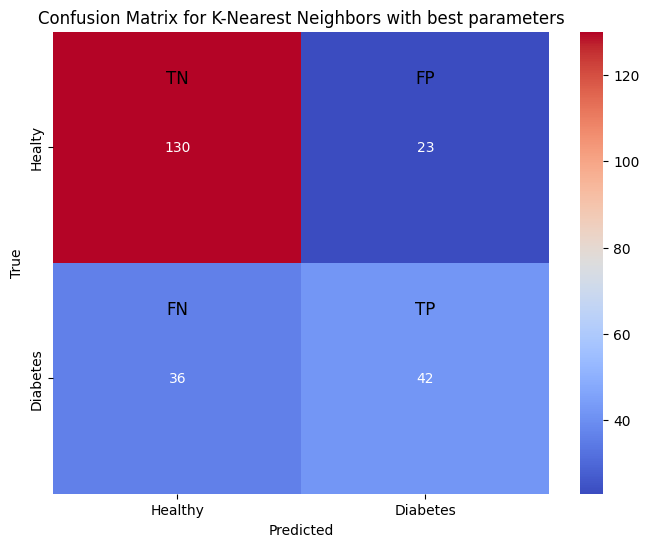

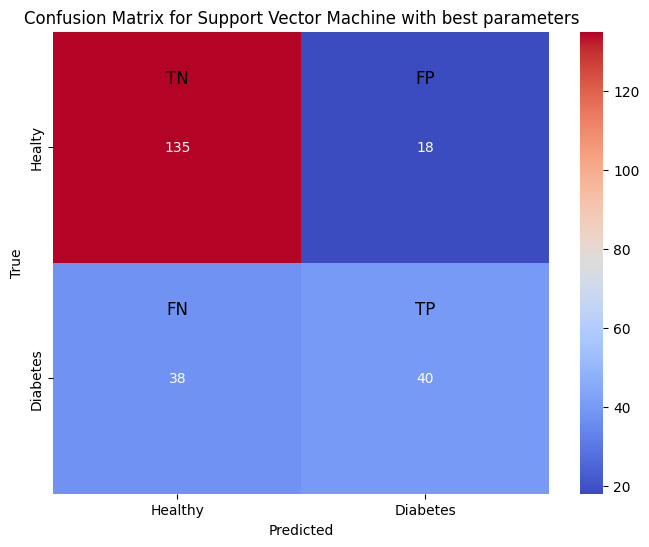

In [ ]:
# Функция для визуализации матрицы ошибок с подписями
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
                xticklabels=['Healthy', 'Diabetes'],
                yticklabels=['Healty', 'Diabetes'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')

    # Добавление подписей для TN, TP, FP, FN
    plt.text(0.5, 0.2, 'TN', ha='center', va='center', color='black', fontsize=12)
    plt.text(1.5, 0.2, 'FP', ha='center', va='center', color='black', fontsize=12)
    plt.text(0.5, 1.2, 'FN', ha='center', va='center', color='black', fontsize=12)
    plt.text(1.5, 1.2, 'TP', ha='center', va='center', color='black', fontsize=12)

    plt.show()

# Визуализация матрицы ошибок для каждой модели
models = [(best_log_reg, 'Logistic Regression with best parameters'),
 (best_knn, 'K-Nearest Neighbors with best parameters'),
  (best_svm, 'Support Vector Machine with best parameters')]

for model, model_name in models:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, model_name)

## Этап 4. Оптимизация порога (для бинарной классификации):
1. Построить PR-кривую и найти оптимальный порог по F1-метрике.
2. Построить ROC-кривую и найти оптимальный порог по G_mean.

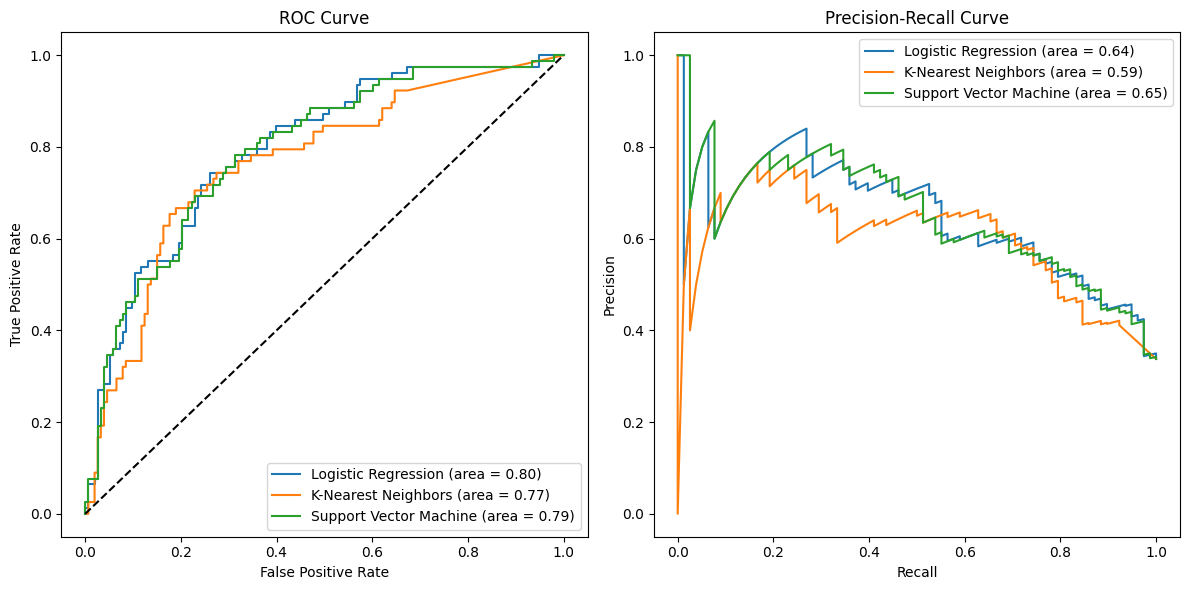

In [ ]:
# Функция для визуализации ROC и PR кривых
def plot_roc_pr_curves(models, X_test, y_test):
    plt.figure(figsize=(12, 6))

    # ROC Curve
    plt.subplot(1, 2, 1)
    for model, model_name in models:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{model_name} (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')

    # PR Curve
    plt.subplot(1, 2, 2)
    for model, model_name in models:
        y_prob = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f"{model_name} (area = {pr_auc:.2f})")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

# Визуализация ROC и PR кривых
models = [(best_log_reg, 'Logistic Regression'), (best_knn, 'K-Nearest Neighbors'), (best_svm, 'Support Vector Machine')]
plot_roc_pr_curves(models, X_test, y_test)

Logistic Regression:


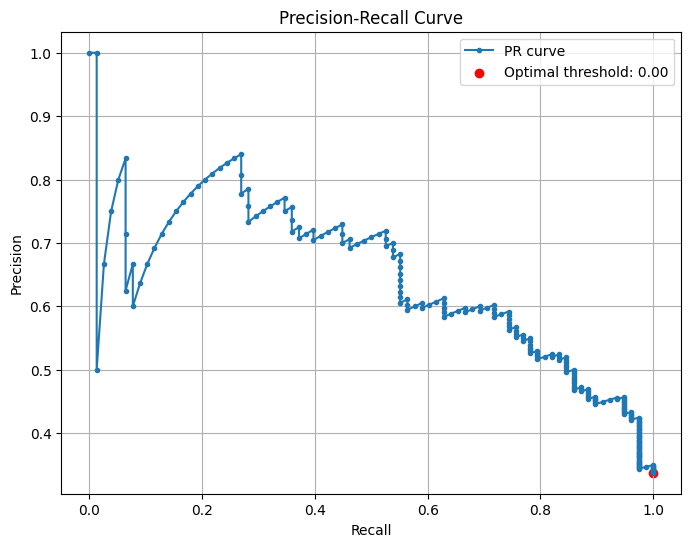

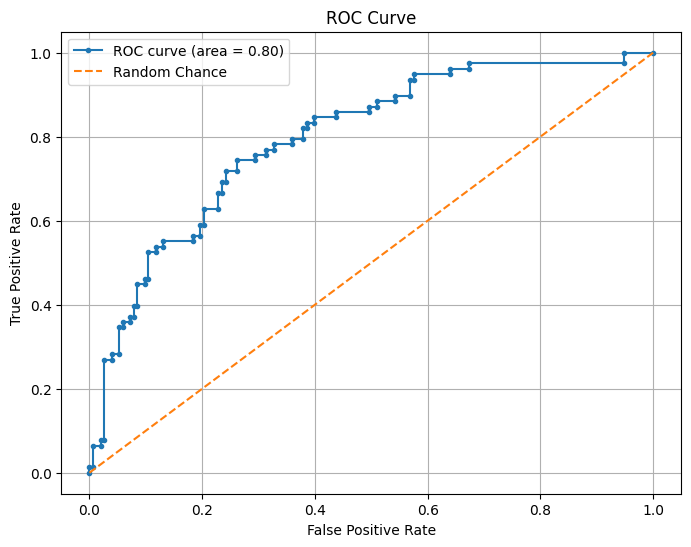

Best F1 Threshold: 0.001477424514759524, Best F1 Score: 0.5882352941176471
Best G-mean Threshold: 0.3279388038406637, Best G-mean Score: 0.7410716539215488

K-Nearest Neighbors:


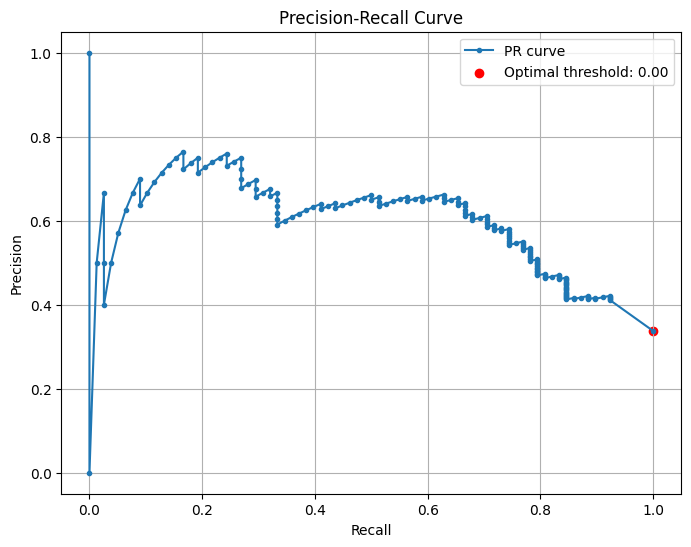

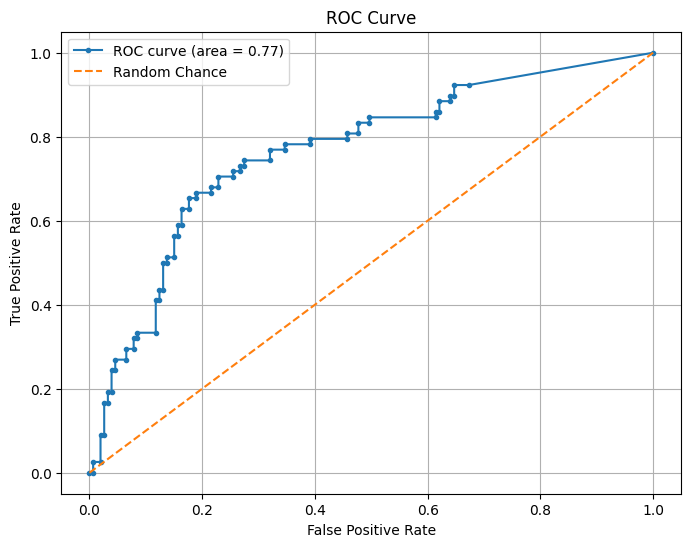

Best F1 Threshold: 0.0, Best F1 Score: 0.5882352941176471
Best G-mean Threshold: 0.4178340058361485, Best G-mean Score: 0.7374444842520548

Support Vector Machine:


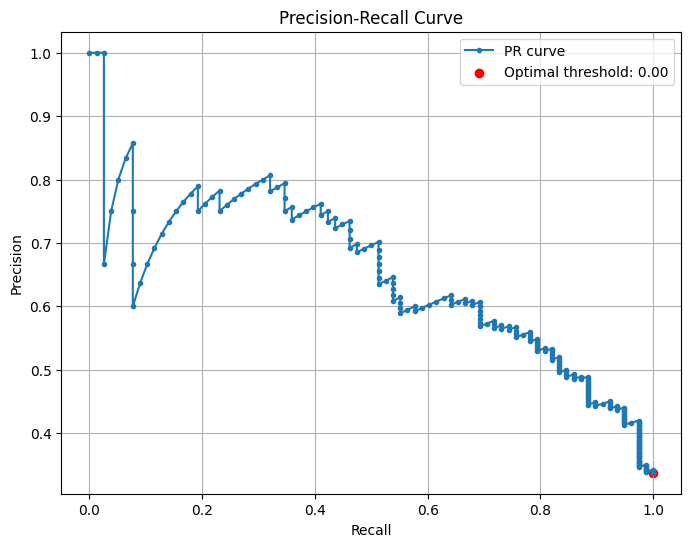

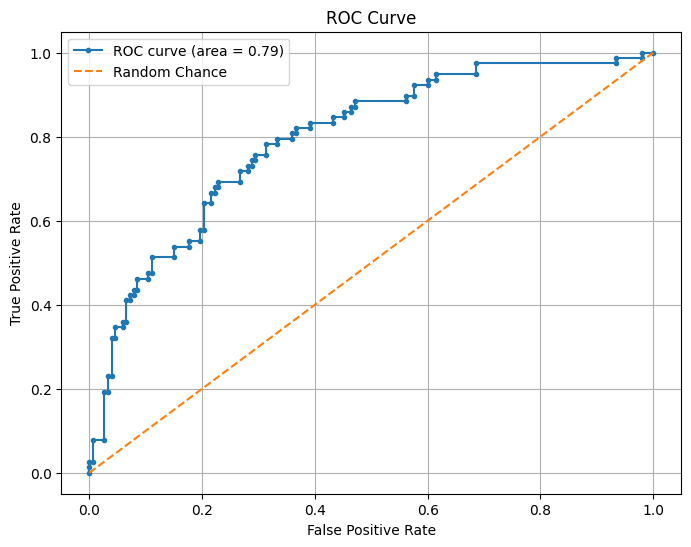

Best F1 Threshold: 0.0024163138884325543, Best F1 Score: 0.5882352941176471
Best G-mean Threshold: 0.29372294377507113, Best G-mean Score: 0.7325993859069716


In [ ]:
# Функция для оценки модели и поиска оптимального порога
def evaluate_model_and_find_threshold(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]

    # PR-кривая и F1-метрика
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    f1_scores = f1_score(y_test, y_pred)
    best_f1_threshold = thresholds[np.argmax(f1_scores)]
    best_f1_score = np.max(f1_scores)

    # Построение графика PR-кривой
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label='PR curve')
    plt.scatter(recall[np.argmax(f1_scores)], precision[np.argmax(f1_scores)], color='red', label=f'Optimal threshold: {best_f1_threshold:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ROC-кривая и G-mean
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)
    g_means = np.sqrt(tpr * (1 - fpr))
    best_g_mean_threshold = thresholds_roc[np.argmax(g_means)]
    best_g_mean_score = np.max(g_means)

    roc_auc = auc(fpr, tpr)

    # Построение графика ROC-кривой
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Best F1 Threshold: {best_f1_threshold}, Best F1 Score: {best_f1_score}")
    print(f"Best G-mean Threshold: {best_g_mean_threshold}, Best G-mean Score: {best_g_mean_score}")

    return best_f1_threshold, best_g_mean_threshold

# Оценка моделей и поиск оптимального порога
print("Logistic Regression:")
best_f1_threshold_log_reg, best_g_mean_threshold_log_reg = evaluate_model_and_find_threshold(best_log_reg, X_test, y_test)

print("\nK-Nearest Neighbors:")
best_f1_threshold_knn, best_g_mean_threshold_knn = evaluate_model_and_find_threshold(best_knn, X_test, y_test)

print("\nSupport Vector Machine:")
best_f1_threshold_svm, best_g_mean_threshold_svm = evaluate_model_and_find_threshold(best_svm, X_test, y_test)